# Descripción del proyecto

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. 

Para lograr desarrollar este proyecto, primero comenzare revisando las distintas bases de datos, revisando si hay datos nulos, datos duplicados, errores en el formato de nombres y solucionarlos de una forma óptima, una vez limpias las bases de datos, se creara un nuevo df con toda la informacion necesaria, para poder realizar el análisis correspondiente, para eso usaremos el método ‘marge’ para unir distintos df, y el método ‘concat’ para agregar las nuevas variables creadas y necesarias para nuestro análisis a nuestro nuevo df.

# Desarrollo

analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos

# Pasos
 
 1. Abrir los archivo con los datos y estudiar la información general
 2. Preparar los datos
 3. Analizar los datos
 4. Probar las hipótesis
 5. Entregar la conclusión general

# Descripción de los datos

¡No te olvides! Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

La tabla users (datos sobre los usuarios):

- user_id — identificador único del usuario
- first_name — nombre del usuario
- last_name — apellido del usuario
- age — edad del usuario (en años)
- reg_date — fecha de suscripción (dd, mm, aa)
- churn_date — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- city — ciudad de residencia del usuario

plan — nombre de la tarifa La tabla calls (datos sobre las llamadas):

- id — identificador único de la llamada
- call_date — fecha de la llamada
- duration — duración de la llamada (en minutos)
- user_id — el identificador del usuario que realiza la llamada
- La tabla messages (datos sobre los SMS):
- id — identificador único del SMS
- message_date — fecha del SMS
- user_id — el identificador del usuario que manda el SMS

La tabla internet (datos sobre las sesiones web):

- id — identificador único de la sesión
- mb_used — el volumen de datos gastados durante la sesión (en megabytes)
- session_date — fecha de la sesión web
- user_id — identificador del usuario

La tabla plans (datos sobre las tarifas):

- plan_name — nombre de la tarifa
- usd_monthly_fee — pago mensual en dólares estadounidenses
- minutes_included — minutos incluidos al mes
- messages_included — SMS incluidos al mes
- mb_per_month_included — datos incluidos al mes (en megabytes)
- usd_per_minute — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
usd_per_message — precio por SMS tras exceder los límites del paquete
usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

## Abrir los archivo con los datos y estudiar la información general

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import levene

In [ ]:
try:
    data_calls = pd.read_csv("/datasets/megaline_calls.csv")
    data_internet = pd.read_csv("/datasets/megaline_internet.csv")
    data_messages = pd.read_csv("/datasets/megaline_messages.csv")
    data_plans = pd.read_csv("/datasets/megaline_plans.csv")
    data_users = pd.read_csv("/datasets/megaline_users.csv")

except:
    data_calls = pd.read_csv("/datasets/megaline_calls.csv")
    data_internet = pd.read_csv("/datasets/megaline_internet.csv")
    data_messages = pd.read_csv("/datasets/megaline_messages.csv")
    data_plans = pd.read_csv("/datasets/megaline_plans.csv")
    data_users = pd.read_csv("/datasets/megaline_users.csv")

### Revision de base de datos calls

In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
data_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
data_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [ ]:
data_calls.duplicated().sum()

0

### Revision de base de datos internet

In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
data_internet.head

<bound method NDFrame.head of               id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]>

In [ ]:
data_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
data_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [ ]:
data_internet.duplicated().sum()

0

### Revision de base de datos messages

In [ ]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
data_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
data_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
data_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [ ]:
data_messages.duplicated().sum()

0

### revision de base de datos plans

In [ ]:
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
data_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
data_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [ ]:
data_plans.duplicated().sum()

0

### revision de base de datos users

In [ ]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
data_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
data_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
data_users.duplicated().sum()

0

### Conclusion General Parte 1

En este primer analisis de los datos podemos decir que la base de datos ususarios presenta datos nulos en la columna ‘churn_date’ y error de formato en la columna ‘reg_date’. Para la base de datos de internet, mensajes y llamadas también presenta error de formato en las columnas relacionadas a fecha, Por último señalar que ninguna base de datos presenta datos duplicados.

## Preparacion los datos

### Data_calls

In [ ]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise') 

In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [ ]:
data_calls['mes'] = data_calls['call_date'].dt.month_name()

In [ ]:
data_calls['duration'] = np.ceil(data_calls['duration'])

In [ ]:
data_calls['duration'] = data_calls['duration'].astype('int')

In [ ]:
data_calls.head()

,id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December


In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   mes        137735 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ MB


Para la base de datos Calls, se cambia el formato de la columna 'call_date'.
Se agrega una nueva columna 'mes'.
Se redondean los valores de la columna 'duration'.

### Data_internet

In [ ]:
data_internet.head(2)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00


In [ ]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
data_internet['mes'] = data_internet['session_date'].dt.month_name()

In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [ ]:
data_internet.head(2)

,id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December


Para la base de datos 'internet', se cambió el formato en la columna 'session_date'.
Se agrega la columna 'mes'

### Data_messages

In [ ]:
data_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [ ]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
data_messages['mes'] = data_messages['message_date'].dt.month_name()

In [ ]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
data_messages.head(2)

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December


Para la base de datos 'messages' se cambió el tipo de formato de la columna 'message_date'. 
Se agrego la columna 'mes'.

### Data_plans

In [ ]:
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Esta base de dato, esta bien, no se realizara cambio alguno 

### Data_users

In [ ]:
data_users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [ ]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
data_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Para la base de datos 'user', se cambio el formato a las columnas 'reg_date', 'churn_date'. Los datos nulos 'churn_date' equivalen al 93.2% de la columna, pero por el momento se dejará asi para ver si tendra un impacto o no en nuestro analisis.

### El número de llamadas realizadas y minutos utilizados al mes

In [ ]:
calls_mes = data_calls.groupby(['user_id','mes'])['id'].count()
calls_mes

user_id  mes      
1000     December     16
1001     August       27
         December     56
         November     64
         October      65
                      ..
1498     September    45
1499     December     65
         November     45
         October      53
         September    41
Name: id, Length: 2258, dtype: int64

In [ ]:
minutos_mes = data_calls.groupby(['user_id','mes'])['duration'].sum()
minutos_mes

user_id  mes      
1000     December     124
1001     August       182
         December     412
         November     426
         October      393
                     ... 
1498     September    363
1499     December     496
         November     308
         October      385
         September    346
Name: duration, Length: 2258, dtype: int64

El primer Código, es para calcular el N° de llamadas por usuario, y el segundo Código es para el N° de minutos utilizado por usuario.

### La cantidad de los SMS enviados por mes

In [ ]:
messeges_mes = data_messages.groupby(['user_id', 'mes'])['id'].count()
messeges_mes

user_id  mes      
1000     December     11
1001     August       30
         December     44
         November     36
         October      53
                      ..
1496     December     11
         November     13
         October      18
         September    21
1497     December     50
Name: id, Length: 1806, dtype: int64

Este Codigo es para calcular la cantidad de mensajes enviados por usuario

In [ ]:
datos_mes = data_internet.groupby(['user_id','mes'])['mb_used'].sum()
datos_mes

user_id  mes      
1000     December      1901.47
1001     August        6919.15
         December     19369.18
         November     18504.30
         October      22330.49
                        ...   
1498     September    22827.28
1499     December     22059.21
         November     16813.83
         October      19492.43
         September    12984.76
Name: mb_used, Length: 2277, dtype: float64

Este Código es para saber la cantidad de datos por usuarios

### Transformacion de Datos para analisis

In [ ]:
nuevo_data = pd.concat([calls_mes, minutos_mes, messeges_mes, datos_mes], axis=1).reset_index().fillna(0)
nuevo_data.columns = ['user_id', 'month', 'calls_made', 'call_duration', 'messages_sent', 'mb_used']
nuevo_data = nuevo_data.merge(data_users, on='user_id')
nuevo_data.head(2)

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,August,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT


In [ ]:
nuevo_data['gb_used'] = (nuevo_data['mb_used'] / 1024).apply(np.ceil)

In [ ]:
nuevo_data = nuevo_data.merge(data_plans, left_on='plan', right_on='plan_name')

Aquí al nuevo_data se le agrega el data_plans con el método Marge, y se realizó la unión con left_on='plan' y right_on='plan_name', debido que no tenían el mismo nombre los df.

In [ ]:
nuevo_data.head(2)

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,churn_date,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,32.0,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
nuevo_data['gb_per_month_included'] = (nuevo_data['mb_per_month_included'] / 1024).apply(np.ceil)

Aqui se creó una nueva columna al data_nuevo, que pasa los datos de MG a GB, para poder hacer más fácil el análisis a futuro 

In [ ]:
nuevo_data.head(2)

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,32.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Los ingresos mensuales de cada usuario (resta el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplica el resultado por el valor de tarifa de llamadas; agrega el cargo mensual según la tarifa de llamadas)

In [ ]:
nuevo_data['message_cost'] = nuevo_data.apply(lambda x: max(0, x['messages_sent'] - x['messages_included']) * x['usd_per_message'], 
                                      axis = 1)
nuevo_data['call_cost'] = nuevo_data.apply(lambda x: max(0, x['call_duration'] - x['minutes_included']) * x['usd_per_minute'], 
                                   axis = 1)
nuevo_data['gb_cost'] = nuevo_data.apply(lambda x: max(0, x['gb_used'] - x['gb_per_month_included']) * x['usd_per_gb'], 
                                axis = 1)
nuevo_data['revenue'] = nuevo_data['message_cost'] + nuevo_data['call_cost'] + nuevo_data['gb_cost'] + nuevo_data['usd_monthly_pay']
nuevo_data.head(2)

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,message_cost,call_cost,gb_cost,revenue
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,14.0,84.0


In [ ]:
data = nuevo_data[['user_id', 'first_name', 'last_name', 'plan_name','month',
                   'calls_made','call_duration','minutes_included','usd_per_minute','call_cost',
                   'messages_sent','messages_included','usd_per_message','message_cost',
                   'gb_used','gb_per_month_included','usd_per_gb','gb_cost','usd_monthly_pay','revenue']]

In [ ]:
data = data.copy()

In [ ]:
data['calls_made'] = data['calls_made'].astype('int64')
data['messages_sent'] = data['messages_sent'].astype('int64')
data['gb_used'] = data['gb_used'].astype('int64')
data.head(2)

,user_id,first_name,last_name,plan_name,month,calls_made,call_duration,minutes_included,usd_per_minute,call_cost,messages_sent,messages_included,usd_per_message,message_cost,gb_used,gb_per_month_included,usd_per_gb,gb_cost,usd_monthly_pay,revenue
0,1000,Anamaria,Bauer,ultimate,December,16,124.0,3000,0.01,0.0,11,1000,0.01,0.0,2,30.0,7,0.0,70,70.0
1,1006,Jesusa,Bradford,ultimate,December,9,59.0,3000,0.01,0.0,139,1000,0.01,0.0,32,30.0,7,14.0,70,84.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   first_name             2293 non-null   object 
 2   last_name              2293 non-null   object 
 3   plan_name              2293 non-null   object 
 4   month                  2293 non-null   object 
 5   calls_made             2293 non-null   int64  
 6   call_duration          2293 non-null   float64
 7   minutes_included       2293 non-null   int64  
 8   usd_per_minute         2293 non-null   float64
 9   call_cost              2293 non-null   float64
 10  messages_sent          2293 non-null   int64  
 11  messages_included      2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  message_cost           2293 non-null   float64
 14  gb_used                2293 non-null   int64  
 15  gb_p

### Conclusión General Parte 2

En la primera parte se calcula el N° de llamadas y cantidad de minutos utilizados por cada usuario, además de la cantidad de mensajes e internet utilizados por cada uno de ellos.
  En la Segunda parte se crearon nuevos df, con la informacion necesario para el análisis, además de algunos cálculos que nos van a ayudar a poder comprobar las hipótesis más adelante. 
además de manipular las distintas columnas para dejar una tabla ordenada para el análisis, se realizó todo lo que pedía la parte 2 del proyecto, incluyendo el redondeo de las cifras como lo pedía el ejercicio y se crearon columnas nuevas que ayudaran a entender el comportamiento, así como también cuanto gasta cada usuario en su plan.


## Analisis de datos

In [ ]:
data_plan_ultimate = data.query("plan_name == 'ultimate'")
plan_ultimate = data_plan_ultimate[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]
plan_ultimate.describe()

,calls_made,call_duration,messages_sent,gb_used,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,60.626389,430.450000,37.551389,17.306944,72.313889
std,33.242994,240.508762,34.767179,7.670108,11.395108
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,260.000000,7.000000,13.000000,70.000000
50%,61.000000,424.000000,30.000000,17.000000,70.000000
75%,80.000000,565.250000,61.000000,21.000000,70.000000
max,191.000000,1369.000000,166.000000,46.000000,182.000000


Para los clientes que cuentan con el plan ultimate existe un promedio 60 llamadas realizadas al mes, un promedio de minutos usados al mes de 382 minutos. un promedio de 37 mensajes enviados mensualamente y 17 Gb de uso promedio mensual. En un plano general ningún cliente llega al limite de sus datos. excepto un grupo que se excede en gb usados mensualmente.

In [ ]:
data_plan_surf = data.query("plan_name == 'surf'")
plan_surf = data_plan_surf[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]
plan_surf.describe()

,calls_made,call_duration,messages_sent,gb_used,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,59.811825,428.749523,31.159568,16.670693,60.706408
std,32.017989,234.453150,33.566717,7.847522,55.388042
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,39.000000,272.000000,3.000000,12.000000,20.000000
50%,60.000000,425.000000,24.000000,17.000000,40.360000
75%,79.000000,576.000000,47.000000,21.000000,80.360000
max,205.000000,1510.000000,266.000000,70.000000,590.370000


Para los usuarios del plan surf se registra un promedio mensual de 60 llamadas,con un promedio de 381 minutos usados al mes,31 mensajes enviados mensualmente y consumo promedio mensual de 16 Gb. Un 25% de los clientes sobrepasa el limite de minutos de su plan y mas del 50% sobrepasa sus Gb disponibles.

In [ ]:
data.groupby('plan_name')['call_duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


media, varianza y desviación estándar, minutos usados

In [ ]:
data.groupby('plan_name')['call_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


Aqui podemos ver una gran diferencia entre los planes, la primera diferencia es que los clientes del plan surf realizan más del doble de llamadas que los clientes del plan ultímate, su mediana están casi iguales con la diferencia que el plan ultime contiene 3000 minutos versus los 500 del plan surf, y lo más relevante que el 50% de los clientes surf, consumen casi la totalidad de minutos de su plan y que en el tercer cuartil, los clientes del plan surf ya están consumiendo minutos adicionales versus los clientes ultímate que no utilizan minutos adicionales, al contrario le sobran minutos.

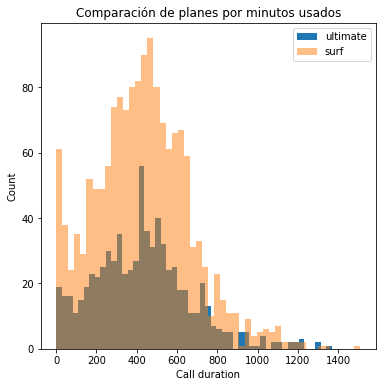

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(plan_ultimate['call_duration'], bins=50, alpha=1, label='ultimate')
plt.hist(plan_surf['call_duration'], bins=50, alpha=0.5, label='surf')

plt.xlabel('Call duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Comparación de planes por minutos usados')
plt.legend(loc='upper right');

Como muestra los histogramas de minutos usados en ambos planes, existe una distribución de sesgo positivo que se afirma diciendo que la media de ambas distribuciones es mayor que la mediana.

In [ ]:
data.groupby('plan_name')['messages_sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


Media, varianza y Desviación estándar para los mensajes enviados 

In [ ]:
data.groupby('plan_name')['messages_sent'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


Diferencia de la media, mensual de los mensajes 

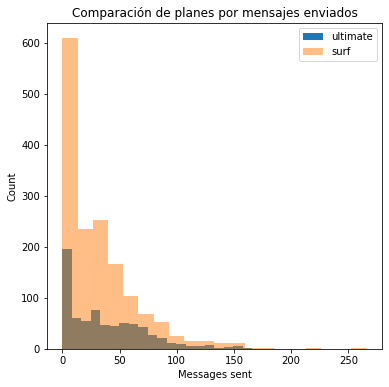

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(plan_ultimate['messages_sent'], bins=20, alpha=1, label='ultimate')
plt.hist(plan_surf['messages_sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Comparación de planes por mensajes enviados')
plt.legend(loc='upper right');

Para la comparación de mensajes enviados de ambos planes,También existe un sesgo positivo.

In [ ]:
 data.groupby('plan_name')['gb_used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


Media, varianza y desviación estándar para los datos consumidos

In [ ]:
data.groupby('plan_name')['gb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,16.670693,7.847522,0.0,12.0,17.0,21.0,70.0
ultimate,720.0,17.306944,7.670108,0.0,13.0,17.0,21.0,46.0


Diferencia de la media de los datos usados

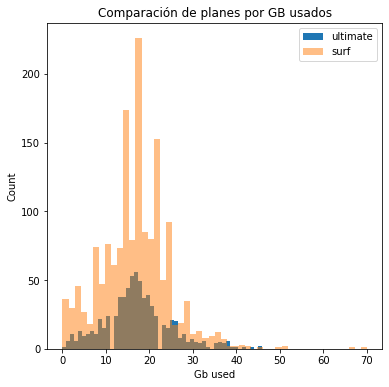

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(plan_ultimate['gb_used'], bins=50, alpha=1, label='ultimate')
plt.hist(plan_surf['gb_used'], bins=50, alpha=0.5, label='surf')

plt.xlabel('Gb used', size=10)
plt.ylabel('Count', size=10)
plt.title('Comparación de planes por GB usados')
plt.legend(loc='upper right');

Según muestra el histograma de comparación de Gb usados, ambos gráficos muestran una distribución muy cercana a una distribución normal pero el histograma de surf tiene un leve sesgo negativo y el histograma de ultimate un leve sesgo positivo.

Como se mencionó más arriba, los planes tienen una distribución muy similar porque los clientes del plan surf, utilizan su plan de una forma muy similar que los clientes ultímate, con la diferencia que el plan surf es más limitado en cuanto a minutos mensajes y mg, lo que hace que se realicen gastos extras para los clientes surf

### Conclusión General Parte 3

Como conclusión en esta parte podemos decir que el plan 'ultime' que tienen un promedio 60 llamadas realizadas al mes, un promedio de minutos usados al mes de 382 minutos. un promedio de 37 mensajes enviados mensualmente y 16.6 Gb de uso promedio mensual. En un plano general ningún cliente llega al límite de sus datos. excepto un grupo que se excede en BG usados mensualmente, generando cobros extras. Para los clientes del plan surf podemos decir que tienen un promedio mensual de 59,8, llamadas, con un promedio de 381 minutos usados al mes,31 mensajes enviados mensualmente y consumo promedio mensual de 16.6 Gb. Un 25% de los clientes sobrepasa el límite de minutos de su plan y más del 50% sobrepasa sus Gb disponibles, generando muchos más cobros extras que el plan ultímate, que lo hace que el plan surf, sea más rentable para la compañía.

## Prueba de hipótesis

El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
Tú decides qué valor alfa usar.

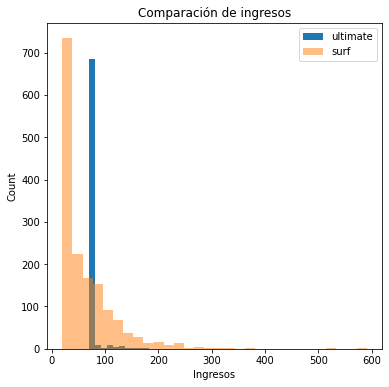

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(plan_ultimate['revenue'], bins=10, alpha=1, label='ultimate')
plt.hist(plan_surf['revenue'], bins=30, alpha=0.5, label='surf')

plt.xlabel('Ingresos', size=10)
plt.ylabel('Count', size=10)
plt.title('Comparación de ingresos')
plt.legend(loc='upper right');

In [ ]:
# Prueba de levene
ultimate = plan_ultimate['revenue']
surf = plan_surf['revenue']

stat, p = levene(ultimate, surf)
p

5.028876110654919e-83

In [ ]:
[np.var(x, ddof=1) for x in [ultimate, surf]]

[129.8484855509195, 3067.835152293878]

Según la prueba de levene, el valor de p esta por debajo de las varianzas por ende el equal_var es False

In [ ]:
# prueba de hipótesis
ultimate = plan_ultimate['revenue']
surf = plan_surf['revenue']

# establecer un nivel crítico 
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('El valor de p es: {}'.format(results.pvalue))

# comparar el valor p con el nivel de significancia
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No se rechazamos la hipótesis nula')

El valor de p es: 3.17039054811355e-15
Rechazamos la hipótesis nula


Formulamos la hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf. Utilizamos un nivel de significación de 0,05. Dado que el valor p es inferior a 0,05, significa que el grupo es diferente, por lo que rechazamos la hipótesis nula. Nuestro análisis sugiere que los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf difieren.

In [ ]:
newyork_jersey = nuevo_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # ingreso de ususarios in NY-NJ
not_newyork_jersey = nuevo_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # ingreso de usuarios que no son de  NY-NJ
print('El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es ${:.2f}'.format(newyork_jersey.mean()))
print('El ingreso promedio de los usuarios de otras regiones es ${:.2f}'.format(not_newyork_jersey.mean()))

El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es $59.92
El ingreso promedio de los usuarios de otras regiones es $65.22


In [ ]:
# Prueba de levene
a = newyork_jersey
b = not_newyork_jersey

stat, p = levene(a, b)
p

0.12580091109612837

In [ ]:
[np.var(x, ddof=1) for x in [a, b]]

[1895.5456899204246, 2225.0479943518917]

Según la prueba de levene, el valor de p esta por encima de las varianzas por ende el equal_var es True

In [ ]:
# Prueva de hipotesis 
newyork_jersey = nuevo_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 
not_newyork_jersey = nuevo_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 

# nivel de significación estadística
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# comparar el valor p con el nivel de significancia
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('Nosotros no rechazamos la hipótesis nula')

The p-value is: 0.03352561588530057
Rechazamos la hipótesis nula


### Conclusión General Parte 4

Formulamos nuestra hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones. Usamos una prueba t para probar la hipótesis usando un nivel de significancia de 0.05. Dado que el valor p es inferior a 0,05, significa que el grupo es diferente, por lo que rechazamos la hipótesis nula. Es posible que no sepamos el tamaño de la diferencia entre los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones. Todo lo que la prueba nos dice es que son diferentes. Sin embargo, al calcular el número promedio de ingresos de los usuarios en ambos grupos, podemos decir con certeza que la media de los ingresos entre los dos grupos es significativamente diferente.

## Conclusión Final 

Tanto los cliente del plan surf y el plan Ultimate, utilizan en promedio la misma cantidad de minutos y datos y mensajes, pero la gran diferencia es que el plan ultímate, contine más minutos, más mensajes y más BG, lo que hace con una muy pequeña población de ellos generen cobros extras o necesiten extender algún servicio, por el otro lado el plan surf, al ser más limitado en minutos, mensajes y BG, los clientes son más propensos a generar cobros extras, por ende es más rentable para la compañía, además de tener más usuarios. Como un plan de entrada está bien pensado, debido que el cargo fijo es más bajo, pero a medida que el cliente va necesitando más la compañía podría fidelizarlo ofreciendo el plan ultímate. 
El ingreso promedio de los usuarios en otras regiones es mayor que el ingreso de los usuarios en el área de Nueva York-Nueva Jersey. El departamento comercial debe invertir en más anuncios en otras regiones ya que Megaline gana más dinero en esa área que el área de Nueva York-Nueva Jersey.
